                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

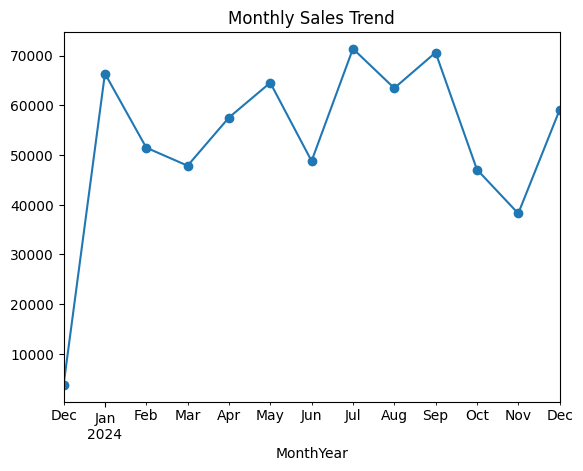

count      199.000000
mean      3467.314372
std       1832.677958
min         82.360000
25%       2162.040000
50%       3137.660000
75%       4770.225000
max      10673.870000
Name: TotalValue, dtype: float64
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


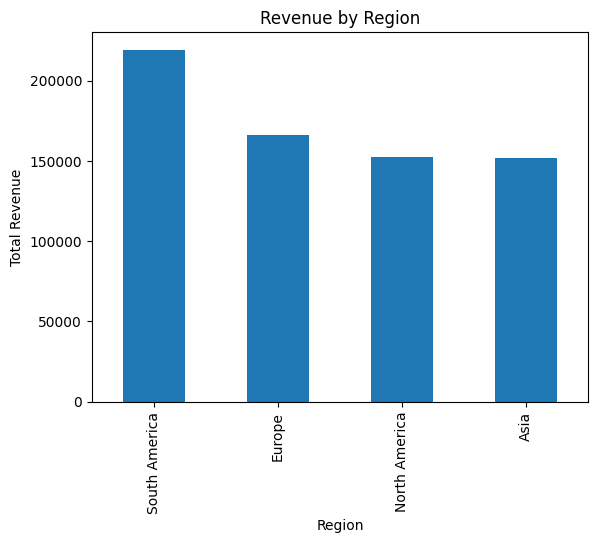

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets
merged_df = transactions.merge(customers, on='CustomerID', how='left')
merged_df = merged_df.merge(products, on='ProductID', how='left')

# Summary statistics
print(merged_df.describe())

# Top 5 most purchased products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_products)

# Revenue by region
revenue_by_region = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(revenue_by_region)

# Monthly sales trend
merged_df['MonthYear'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_sales = merged_df.groupby('MonthYear')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.show()

# Customer spending analysis
customer_spending = merged_df.groupby('CustomerID')['TotalValue'].sum()
print(customer_spending.describe())

# Revenue distribution across product categories
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_revenue)

# Visualization for revenue by region
revenue_by_region.plot(kind='bar', title='Revenue by Region')
plt.ylabel('Total Revenue')
plt.show()
